
Subject - Major Project (Part-I)                               
Subject code - COC4980     
**Traffic Sign Detection and Recognition**               
by-       
Prashant Kumar (17COB020)                                      
Padam Prakash  (17COB008)

In [ ]:
# your code here

**Step 1: Environment Setup** 

1(a): **Import python libraries**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import csv
import pickle

1(b): **mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Step 2: **Load dataset from drive** 

In [ ]:
# storing files path from drive
testing_bin_file="/content/drive/My Drive/CODING/GTSC Major /test.p"
training_bin_file="/content/drive/My Drive/CODING/GTSC Major /train.p"
validation_bin_file="/content/drive/My Drive/CODING/GTSC Major /valid.p"

#  parsing dataset file in binary mode 'rb' with file location
with open(validation_bin_file, mode='rb') as bin:   
    valid = pickle.load(bin)
with open(testing_bin_file, mode='rb') as bin:
    test = pickle.load(bin)
with open(training_bin_file, mode='rb') as bin:
    train = pickle.load(bin)

# list of traffic sign names 
lables=['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)',
        'Speed limit (60km/h)','Speed limit (70km/h)','Speed limit (80km/h)',
        'End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)',
        'No passing','No passing for vehicles over 3.5 metric tons','Right-of-way at the next intersection',
        'Priority road','Yield','Stop','No vehicles','Vehicles over 3.5 metric tons prohibited','No entry',
        'General caution','Dangerous curve to the left','Dangerous curve to the right','Double curve',
        'Bumpy road','Slippery road','Road narrows on the right','Road work','Traffic signals','Pedestrians',
        'Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing',
        'End of all speed and passing limits','Turn right ahead','Turn left ahead','Ahead only',
        'Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
        'End of no passing','End of no passing by vehicles over 3.5 metric tons']

# len(lables)

**Step 3: Dataset**

3.1 dataset detail

In [ ]:
# train dataset
print('training set: ')
print(train.keys())
print("coords ",train['coords'].shape)
print("labels ",train['labels'].shape)
print("sizes ",train['sizes'].shape)
print("feature ",train['features'].shape)
# print(train['features'][0])

print('\nvalidation set: ')
print(valid.keys())
print("coords ",valid['coords'].shape)
print("labels ",valid['labels'].shape)
print("sizes ",valid['sizes'].shape)
print("feature ",valid['features'].shape)
# print(valid['features'][0])

print('\ntest set: ')
print(test.keys())
print("coords ",test['coords'].shape)
print("labels ",test['labels'].shape)
print("sizes ",test['sizes'].shape)
print("feature ",test['features'].shape)
# print(test['features'][0])

training set: 
dict_keys(['coords', 'labels', 'features', 'sizes'])
coords  (34799, 4)
labels  (34799,)
sizes  (34799, 2)
feature  (34799, 32, 32, 3)

validation set: 
dict_keys(['coords', 'labels', 'features', 'sizes'])
coords  (4410, 4)
labels  (4410,)
sizes  (4410, 2)
feature  (4410, 32, 32, 3)

test set: 
dict_keys(['sizes', 'coords', 'features', 'labels'])
coords  (12630, 4)
labels  (12630,)
sizes  (12630, 2)
feature  (12630, 32, 32, 3)


3.2 split into train, test and validation

In [ ]:
# training
x_train=train['features']
y_train=train['labels']
print(x_train.shape,y_train.shape)
# testing 
x_test=test['features']
y_test=test['labels']
print(x_test.shape,y_test.shape)
# validation
x_valid=valid['features']
y_valid=valid['labels']
print(x_valid.shape,y_valid.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


3.3 Plotting some images from each category

In [ ]:
import matplotlib.pyplot as plt
import random

def plot_image(x,y,lab,cmap):
    plt.figure(figsize=(20,18))
    for i in range(5):
        plt.subplot(1,5,i+1)
        ind = random.randint(0, len(x))
        cmap = 'gray' if len(x[ind].shape) == 2 else cmap
        plt.imshow(x[ind], cmap = cmap)
        plt.xlabel(lables[y[ind]])
        plt.ylabel(lab)
        plt.xticks([])
        plt.yticks([])
    # plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

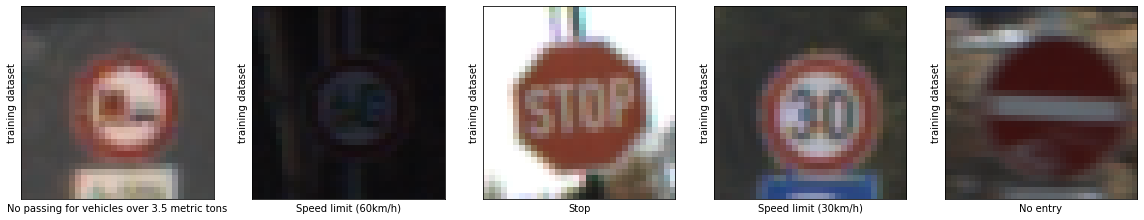

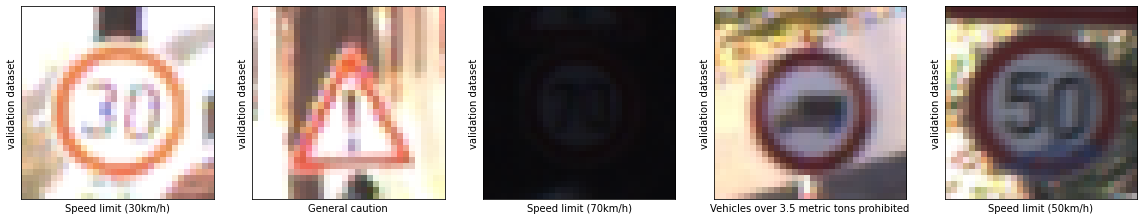

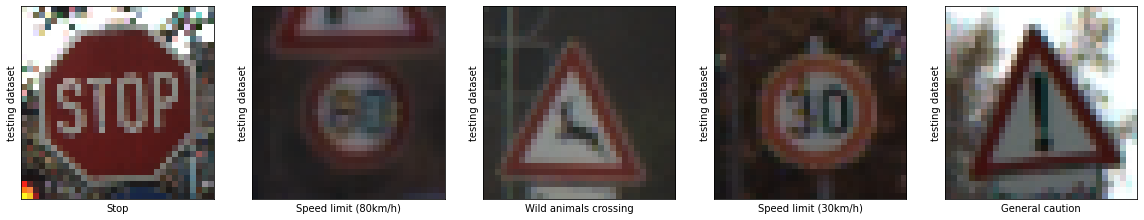

In [ ]:
# plotting for different categories
plot_image(x_train,y_train,"training dataset",None)
plot_image(x_valid,y_valid,"validation dataset",None)
plot_image(x_test,y_test,"testing dataset",None)

3.4 we will use numpy to plot a histogram of the count of images in each unique class

In [ ]:
def histogram_plot(dataset, label):
    hist, bins = np.histogram(dataset, bins=43)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(label)
    plt.ylabel("Image count")
    plt.show()

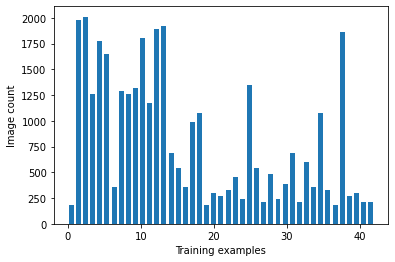

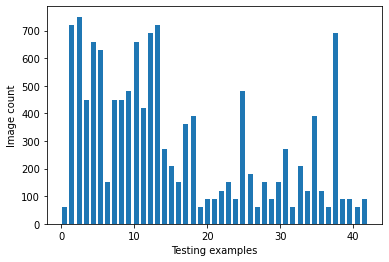

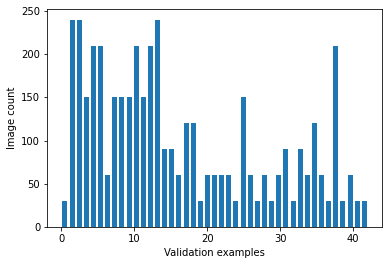

In [ ]:
# Plotting histograms of the count of each sign
histogram_plot(y_train, "Training examples")
histogram_plot(y_test, "Testing examples")
histogram_plot(y_valid, "Validation examples")

**4. DATA PROCESSING**

4.1 Shuffling.   
4.2 Grayscaling.   
4.3 Local Histogram Equalization.   
4.4 Normalization.

4.1 Shuffle 

In [ ]:
# shuffling
from sklearn.utils import shuffle
# before shuffling
print("Before shuffling: ")
print(y_train[0])
print(x_train[0][0][:2])
x_train,y_train=shuffle(x_train,y_train)
x_valid,y_valid=shuffle(x_valid,y_valid)
# after shuffling
print("\nAfter shuffling: ")
print(y_train[0])
print(x_train[0][0][:2])

Before shuffling: 
41
[[28 25 24]
 [27 24 23]]

After shuffling: 
30
[[143 161 196]
 [142 162 196]]


4.2 **GrayScaling**

In [ ]:
def convert_to_gray_scale(image):
    # Convert images to gray scale.
    # Parameters:
    # image: An np.array compatible with plt.imshow.
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

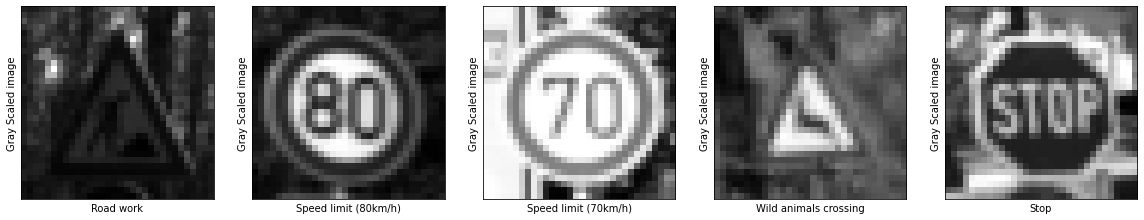

In [ ]:
# Sample images after greyscaling
gray_images_x_train = list(map(convert_to_gray_scale, x_train))
plot_image(gray_images_x_train, y_train, "Gray Scaled image", "gray")

4.3 **Local Histogram Equalization**

In [ ]:
import skimage.morphology as morp
from skimage.filters import rank
def local_histogram_equalize(image):
    # Apply local histogram equalization to grayscale images.
    # Parameters:
    # image: A grayscale image.
    kernel = morp.disk(30)
    img_local = rank.equalize(image, selem=kernel)
    return img_local

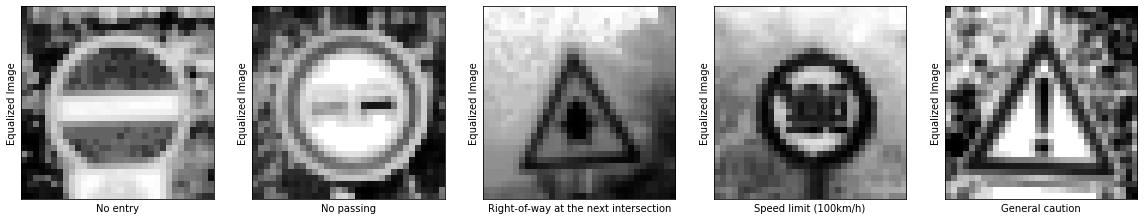

In [ ]:
# Sample images after Local Histogram Equalization
equalized_images_x_train = list(map(local_histogram_equalize, gray_images_x_train))
plot_image(equalized_images_x_train, y_train, "Equalized Image", "gray")

4.4 **Normalization**

In [ ]:
def normalize_image(image):
    # Normalize images to [0, 1] scale.
    # Parameters:
    # image: An np.array compatible with plt.imshow.
    image = np.divide(image, 255)
    return image

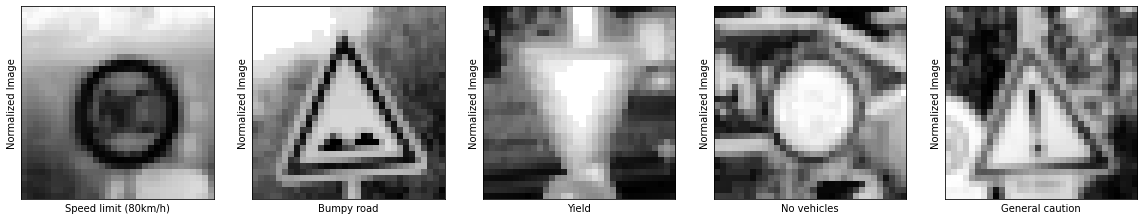

In [ ]:
# Sample images after normalization
n_training = x_train.shape
normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
for i, img in enumerate(equalized_images_x_train):
    normalized_images[i] = normalize_image(img)
plot_image(normalized_images, y_train, "Normalized Image", "gray")
normalized_images = normalized_images[..., None]

In [ ]:
def preprocess(data):
    # Applying the preprocessing steps to the input data.
    # Parameters:
    # data: An np.array compatible with plt.imshow.
    gray_images = list(map(convert_to_gray_scale, data))
    equalized_images = list(map(local_histogram_equalize, gray_images))
    n_training = data.shape
    normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
    for i, img in enumerate(equalized_images):
        normalized_images[i] = normalize_image(img)
    normalized_images = normalized_images[..., None]
    return normalized_images

5. **MODEL / ARCHITECTURE**




**5.1** **LeNet-5** :  
LeNet-5 is a convolutional network designed for handwritten and machine-printed character recognition. It was introduced by the famous Yann LeCun in his paper Gradient-Based Learning Applied to Document Recognition in 1998. Although this ConvNet is intended to classify hand-written digits, we're confident it have a very high accuracy when dealing with traffic signs, given that both hand-written digits and traffic signs are given to the computer in the form of pixel images.

LeNet-5 architecture:

This ConvNet follows these steps:

Input => Convolution => ReLU => Pooling => Convolution => ReLU => Pooling => FullyConnected => ReLU => FullyConnected

Layer 1 (Convolutional): The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2 (Convolutional): The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flattening: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

Layer 3 (Fully Connected): This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4 (Fully Connected): This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5 (Fully Connected): This should have 43 outputs.

In [ ]:
class LaNet:  

    def __init__(self, n_out=43, mu=0, sigma=0.1, learning_rate=0.001):
        # Hyperparameters
        self.mu = mu
        self.sigma = sigma

        # Layer 1 (Convolutional): Input = 32x32x1. Output = 28x28x6.
        self.filter1_width = 5
        self.filter1_height = 5
        self.input1_channels = 1
        self.conv1_output = 6
        # Weight and bias
        self.conv1_weight = tf.Variable(tf.truncated_normal(
            shape=(self.filter1_width, self.filter1_height, self.input1_channels, self.conv1_output),
            mean = self.mu, stddev = self.sigma))
        self.conv1_bias = tf.Variable(tf.zeros(self.conv1_output))
        # Apply Convolution
        self.conv1 = tf.nn.conv2d(x, self.conv1_weight, strides=[1, 1, 1, 1], padding='VALID') + self.conv1_bias
        
        # Activation:
        self.conv1 = tf.nn.relu(self.conv1)
        
        # Pooling: Input = 28x28x6. Output = 14x14x6.
        self.conv1 = tf.nn.max_pool(self.conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        # Layer 2 (Convolutional): Output = 10x10x16.
        self.filter2_width = 5
        self.filter2_height = 5
        self.input2_channels = 6
        self.conv2_output = 16
        # Weight and bias
        self.conv2_weight = tf.Variable(tf.truncated_normal(
            shape=(self.filter2_width, self.filter2_height, self.input2_channels, self.conv2_output),
            mean = self.mu, stddev = self.sigma))
        self.conv2_bias = tf.Variable(tf.zeros(self.conv2_output))
        # Apply Convolution
        self.conv2 = tf.nn.conv2d(self.conv1, self.conv2_weight, strides=[1, 1, 1, 1], padding='VALID') + self.conv2_bias
        
        # Activation:
        self.conv2 = tf.nn.relu(self.conv2)
        
        # Pooling: Input = 10x10x16. Output = 5x5x16.
        self.conv2 = tf.nn.max_pool(self.conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        # Flattening: Input = 5x5x16. Output = 400.
        self.fully_connected0 = flatten(self.conv2)
        
        # Layer 3 (Fully Connected): Input = 400. Output = 120.
        self.connected1_weights = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = self.mu, stddev = self.sigma))
        self.connected1_bias = tf.Variable(tf.zeros(120))
        self.fully_connected1 = tf.add((tf.matmul(self.fully_connected0, self.connected1_weights)), self.connected1_bias)
        
        # Activation:
        self.fully_connected1 = tf.nn.relu(self.fully_connected1)
    
        # Layer 4 (Fully Connected): Input = 120. Output = 84.
        self.connected2_weights = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = self.mu, stddev = self.sigma))
        self.connected2_bias = tf.Variable(tf.zeros(84))
        self.fully_connected2 = tf.add((tf.matmul(self.fully_connected1, self.connected2_weights)), self.connected2_bias)
        
        # Activation.
        self.fully_connected2 = tf.nn.relu(self.fully_connected2)
    
        # Layer 5 (Fully Connected): Input = 84. Output = 43.
        self.output_weights = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = self.mu, stddev = self.sigma))
        self.output_bias = tf.Variable(tf.zeros(43))
        self.logits =  tf.add((tf.matmul(self.fully_connected2, self.output_weights)), self.output_bias)

        # Training operation
        self.one_hot_y = tf.one_hot(y, n_out)
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.one_hot_y)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
        self.training_operation = self.optimizer.minimize(self.loss_operation)

        # Accuracy operation
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        # Saving all variables
        self.saver = tf.train.Saver()
    


    def y_predict(self, X_data, BATCH_SIZE=64):
        num_examples = len(X_data)
        y_pred = np.zeros(num_examples, dtype=np.int32)
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x = X_data[offset:offset+BATCH_SIZE]
            y_pred[offset:offset+BATCH_SIZE] = sess.run(tf.argmax(self.logits, 1), 
                               feed_dict={x:batch_x, keep_prob:1, keep_prob_conv:1})
        return y_pred
    

    
    def evaluate(self, X_data, y_data, BATCH_SIZE=64):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, 
                                feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv: 1.0 })
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

**5.2 VGGNet**

VGGNet was first introduced in 2014 by K. Simonyan and A. Zisserman from the University of Oxford in a paper called Very Deep Convolutional Networks for Large-Scale Image Recognition. They were investigating the convolutional network depth on its accuracy in the large-scale image recognition setting. Their main contribution is a thorough evaluation of networks of increasing depth using an architecture with very small (3x3) convolution filters, which shows that a significant improvement on the prior-art configurations can be achieved by pushing the depth to 16-19 weight layers.

VGGNet architecture:

The original VGGNet architecture has 16-19 layers, but I've excluded some of them and implemented a modified version of only 12 layers to save computational resources.

This ConvNet follows these steps:

Input => Convolution => ReLU => Convolution => ReLU => Pooling => Convolution => ReLU => Convolution => ReLU => Pooling => Convolution => ReLU => Convolution => ReLU => Pooling => FullyConnected => ReLU => FullyConnected => ReLU => FullyConnected

Layer 1 (Convolutional): The output shape should be 32x32x32.

Activation. Your choice of activation function.

Layer 2 (Convolutional): The output shape should be 32x32x32.

Activation. Your choice of activation function.

Layer 3 (Pooling) The output shape should be 16x16x32.

Layer 4 (Convolutional): The output shape should be 16x16x64.

Activation. Your choice of activation function.

Layer 5 (Convolutional): The output shape should be 16x16x64.

Activation. Your choice of activation function.

Layer 6 (Pooling) The output shape should be 8x8x64.

Layer 7 (Convolutional): The output shape should be 8x8x128.

Activation. Your choice of activation function.

Layer 8 (Convolutional): The output shape should be 8x8x128.

Activation. Your choice of activation function.

Layer 9 (Pooling) The output shape should be 4x4x128.

Flattening: Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

Layer 10 (Fully Connected): This should have 128 outputs.

Activation. Your choice of activation function.

Layer 11 (Fully Connected): This should have 128 outputs.

Activation. Your choice of activation function.

Layer 12 (Fully Connected): This should have 43 outputs.

In [ ]:
class VGGnet:  

    def __init__(self, n_out=43, mu=0, sigma=0.1, learning_rate=0.001):
        # Hyperparameters
        self.mu = mu
        self.sigma = sigma

        # Layer 1 (Convolutional): Input = 32x32x1. Output = 32x32x32.
        self.conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 32), mean = self.mu, stddev = self.sigma))
        self.conv1_b = tf.Variable(tf.zeros(32))
        self.conv1   = tf.nn.conv2d(x, self.conv1_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv1_b

        # ReLu Activation.
        self.conv1 = tf.nn.relu(self.conv1)

        # Layer 2 (Convolutional): Input = 32x32x32. Output = 32x32x32.
        self.conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = self.mu, stddev = self.sigma))
        self.conv2_b = tf.Variable(tf.zeros(32))
        self.conv2   = tf.nn.conv2d(self.conv1, self.conv2_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv2_b

        # ReLu Activation.
        self.conv2 = tf.nn.relu(self.conv2)

        # Layer 3 (Pooling): Input = 32x32x32. Output = 16x16x32.
        self.conv2 = tf.nn.max_pool(self.conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv2 = tf.nn.dropout(self.conv2, keep_prob_conv)

        # Layer 4 (Convolutional): Input = 16x16x32. Output = 16x16x64.
        self.conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = self.mu, stddev = self.sigma))
        self.conv3_b = tf.Variable(tf.zeros(64))
        self.conv3   = tf.nn.conv2d(self.conv2, self.conv3_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv3_b

        # ReLu Activation.
        self.conv3 = tf.nn.relu(self.conv3)

        # Layer 5 (Convolutional): Input = 16x16x64. Output = 16x16x64.
        self.conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = self.mu, stddev = self.sigma))
        self.conv4_b = tf.Variable(tf.zeros(64))
        self.conv4   = tf.nn.conv2d(self.conv3, self.conv4_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv4_b

        # ReLu Activation.
        self.conv4 = tf.nn.relu(self.conv4)

        # Layer 6 (Pooling): Input = 16x16x64. Output = 8x8x64.
        self.conv4 = tf.nn.max_pool(self.conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv4 = tf.nn.dropout(self.conv4, keep_prob_conv) # dropout

        # Layer 7 (Convolutional): Input = 8x8x64. Output = 8x8x128.
        self.conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = self.mu, stddev = self.sigma))
        self.conv5_b = tf.Variable(tf.zeros(128))
        self.conv5   = tf.nn.conv2d(self.conv4, self.conv5_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv5_b

        # ReLu Activation.
        self.conv5 = tf.nn.relu(self.conv5)

        # Layer 8 (Convolutional): Input = 8x8x128. Output = 8x8x128.
        self.conv6_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 128), mean = self.mu, stddev = self.sigma))
        self.conv6_b = tf.Variable(tf.zeros(128))
        self.conv6   = tf.nn.conv2d(self.conv5, self.conv6_W, strides=[1, 1, 1, 1], padding='SAME') + self.conv6_b

        # ReLu Activation.
        self.conv6 = tf.nn.relu(self.conv6)

        # Layer 9 (Pooling): Input = 8x8x128. Output = 4x4x128.
        self.conv6 = tf.nn.max_pool(self.conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        self.conv6 = tf.nn.dropout(self.conv6, keep_prob_conv) # dropout

        # Flatten. Input = 4x4x128. Output = 2048.
        self.fc0   = flatten(self.conv6)

        # Layer 10 (Fully Connected): Input = 2048. Output = 128.
        self.fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 128), mean = self.mu, stddev = self.sigma))
        self.fc1_b = tf.Variable(tf.zeros(128))
        self.fc1   = tf.matmul(self.fc0, self.fc1_W) + self.fc1_b

        # ReLu Activation.
        self.fc1    = tf.nn.relu(self.fc1)
        self.fc1    = tf.nn.dropout(self.fc1, keep_prob) # dropout

        # Layer 11 (Fully Connected): Input = 128. Output = 128.
        self.fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 128), mean = self.mu, stddev = self.sigma))
        self.fc2_b  = tf.Variable(tf.zeros(128))
        self.fc2    = tf.matmul(self.fc1, self.fc2_W) + self.fc2_b

        # ReLu Activation.
        self.fc2    = tf.nn.relu(self.fc2)
        self.fc2    = tf.nn.dropout(self.fc2, keep_prob) # dropout

        # Layer 12 (Fully Connected): Input = 128. Output = n_out.
        self.fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, n_out), mean = self.mu, stddev = self.sigma))
        self.fc3_b  = tf.Variable(tf.zeros(n_out))
        self.logits = tf.matmul(self.fc2, self.fc3_W) + self.fc3_b

        # Training operation
        self.one_hot_y = tf.one_hot(y, n_out)
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=self.logits, labels=self.one_hot_y)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
        self.training_operation = self.optimizer.minimize(self.loss_operation)

        # Accuracy operation
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        # Saving all variables
        self.saver = tf.train.Saver()
        
    def y_predict(self, X_data, BATCH_SIZE=64):
        num_examples = len(X_data)
        y_pred = np.zeros(num_examples, dtype=np.int32)
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x = X_data[offset:offset+BATCH_SIZE]
            y_pred[offset:offset+BATCH_SIZE] = sess.run(tf.argmax(self.logits, 1), 
                               feed_dict={x:batch_x, keep_prob:1, keep_prob_conv:1})
        return y_pred
    
    def evaluate(self, X_data, y_data, BATCH_SIZE=64):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(self.accuracy_operation, 
                                feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, keep_prob_conv: 1.0 })
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

**6. Model Training and Evaluation**

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow.compat.v1.layers import flatten
#  tf.compat.v1.layers.flatten
# from tensorflow.contrib.layers import flatten
x= tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)       # For fully-connected layers
keep_prob_conv = tf.placeholder(tf.float32)  # For convolutional layers

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Preprocessing Validation Dataset
X_valid_preprocessed = preprocess(x_valid)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 64
DIR = 'Saved_Models_Major'
n_classes=len(lables)

**Training LeNet and Accuracy:**




In [ ]:
LeNet_Model = LaNet(n_out = n_classes)
model_name = "LeNet"

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(y_train)
    print("Training ...")
    print()
    for i in range(EPOCHS):
        normalized_images, y_train = shuffle(normalized_images, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = normalized_images[offset:end], y_train[offset:end]
            sess.run(LeNet_Model.training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5, keep_prob_conv: 0.7})
            
        validation_accuracy = LeNet_Model.evaluate(X_valid_preprocessed, y_valid)
        print("EPOCH {} : Validation Accuracy = {:.3f}%".format(i+1, (validation_accuracy*100)))
    LeNet_Model.saver.save(sess, os.path.join(DIR, model_name))
    print("Model saved")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Training ...

EPOCH 1 : Validation Accuracy = 79.569%
EPOCH 2 : Validation Accuracy = 87.279%
EPOCH 3 : Validation Accuracy = 90.000%
EPOCH 4 : Validation Accuracy = 90.272%
EPOCH 5 : Validation Accuracy = 90.181%
EPOCH 6 : Validation Accuracy = 89.093%
EPOCH 7 : Validation Accuracy = 91.723%
EPOCH 8 : Validation Accuracy = 91.587%
EPOCH 9 : Validation Accuracy = 92.154%
EPOCH 10 : Validation Accuracy = 92.132%
EPOCH 11 : Validation Accuracy = 90.227%
EPOCH 12 : Validation Accuracy = 92.812%
EPOCH 13 : Validation Accuracy = 91.247%
EPOCH 14 : Validation Accuracy = 91.156%
EPOCH 15 : Validation Accuracy = 92.630%
EPOCH 16 : Validation Accuracy = 92.766%
EPOCH 17 : Validation Accuracy = 92.313%
EPOCH 18 : Validation Accuracy = 92.290%
EPOCH 19 : Validation Accuracy = 92.789%
EPOCH 20 : Validation Accuracy = 93.787%
EPOCH 21 : Validation Accuracy = 93.016%
EPOCH 22 : Validation Accuracy = 92.971%
EPOCH 23 : Validation Accuracy = 91.769%
EPOCH 24 : Validation Accuracy = 93.787%
EPOCH 25 : 

**Training VGGNet Model and Accuracy:**

In [ ]:
VGGNet_Model = VGGnet(n_out = n_classes)
model_name = "VGGNet"

# Validation set preprocessing
# X_valid_preprocessed = preprocess(X_valid)
one_hot_y_valid = tf.one_hot(y_valid, 43)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(y_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        normalized_images, y_train = shuffle(normalized_images, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = normalized_images[offset:end], y_train[offset:end]
            sess.run(VGGNet_Model.training_operation, 
            feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5, keep_prob_conv: 0.7})

        validation_accuracy = VGGNet_Model.evaluate(X_valid_preprocessed, y_valid)
        print("EPOCH {} : Validation Accuracy = {:.3f}%".format(i+1, (validation_accuracy*100)))
    VGGNet_Model.saver.save(sess, os.path.join(DIR, model_name))
    print("Model saved")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/core.py:329: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Training...

EPOCH 1 : Validation Accuracy = 33.107%
EPOCH 2 : Validation Accuracy = 69.569%
EPOCH 3 : Validation Accuracy = 82.925%
EPOCH 4 : Validation Accuracy = 89.206%
EPOCH 5 : Validation Accuracy = 94.263%
EPOCH 6 : Validation Accuracy = 94.875%
EPOCH 7 : Validation Accuracy = 96.032%
EPOCH 8 : Validation Accuracy = 97.256%
EPOCH 9 : Validation Accuracy = 97.234%
EPOCH 10 : Validation Accuracy = 97.800%
EPOCH 11 : Validation Accuracy = 98.254%
EPOCH 12 : Validation Accuracy = 98.821%
EPOCH 13 : Validation Accuracy = 98.707%
EPOCH 14 : Validation Accuracy = 98.322%
EPOCH 15 : Validation Accuracy = 98.639%
EPOCH 16 : Validation Accuracy = 98.277%
EPOCH 17 : Validation Accuracy = 98.617%
EPOCH 18 : Validation Accuracy = 98.730%
EPOCH 19 : Validation Accuracy = 98.776%
EPOCH 20 : Validation Accuracy = 98.821%
EPOCH 21 : Validation Accuracy = 98.753%
EPOCH 22 : Validation Accuracy = 98.707%
EPOCH 23 : Validation Accuracy = 98.730%
EPOCH 24 : Validation Accuracy = 98.753%
EPOCH 25 : V

**Testing**

In [ ]:
# VGGNet
X_test_preprocessed = preprocess(x_test)
with tf.Session() as sess:
    VGGNet_Model.saver.restore(sess, os.path.join(DIR, "VGGNet"))
    y_pred = VGGNet_Model.y_predict(X_test_preprocessed)
    test_accuracy = sum(y_test == y_pred)/len(y_test)
    print("Test Accuracy = {:.1f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from Saved_Models_Major/VGGNet
Test Accuracy = 97.1%


In [ ]:
# LeNet
X_test_preprocessed = preprocess(x_test)
with tf.Session() as sess:
    LeNet_Model.saver.restore(sess, os.path.join(DIR, "LeNet"))
    y_pred = LeNet_Model.y_predict(X_test_preprocessed)
    test_accuracy = sum(y_test == y_pred)/len(y_test)
    print("Test Accuracy = {:.1f}%".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from Saved_Models_Major/LeNet
Test Accuracy = 92.3%


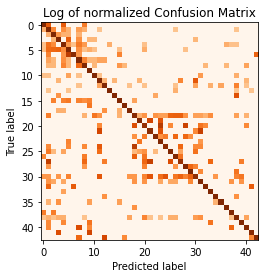

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm = np.log(.0001 + cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title('Log of normalized Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()